<a href="https://colab.research.google.com/github/Gapinian/Network-Science-ICN-2024/blob/main/S4_resist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 4
## Robustness and resilience of networked systems

In [274]:
import networkx as nx

In [275]:
G = nx.generators.classic.barbell_graph(6, 2)
coords = nx.circular_layout(G)
rank = nx.pagerank(G) # default damping
print(list(rank.items()))

[(0, 0.07365335779232182), (1, 0.07365335779232182), (2, 0.07365335779232182), (3, 0.07365335779232182), (4, 0.07365335779232182), (5, 0.09074148292328747), (6, 0.040991728115103564), (7, 0.04099172811510357), (8, 0.09074148292328746), (9, 0.07365335779232181), (10, 0.07365335779232181), (11, 0.07365335779232181), (12, 0.07365335779232181), (13, 0.07365335779232181)]


In [276]:
from networkx.algorithms.centrality import edge_betweenness_centrality
centrality = edge_betweenness_centrality(G)
print(list(centrality.items())[:3])

[((0, 1), 0.01098901098901099), ((0, 2), 0.01098901098901099), ((0, 3), 0.01098901098901099)]


In [277]:
# normalize to [0, 1]
low = min(centrality.values())
high = max(centrality.values())
span = high - low
weight = [(centrality[e] - low) / span for e in G.edges()]

In [278]:
opt = { 'node_size': 200,
        'width': 3,
        'with_labels': True,
        'font_color': 'black' }

(-1.2099999991059305,
 1.2099999905909813,
 -1.1796627376489404,
 1.179662775682756)

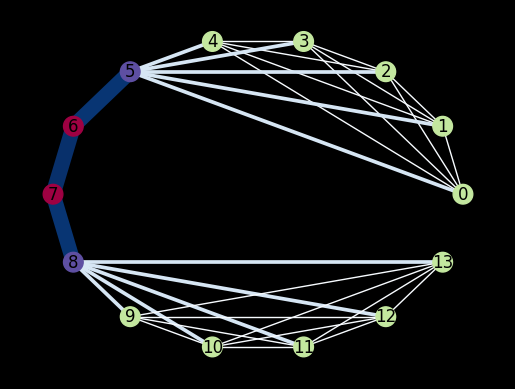

In [279]:
if 'width' in opt:
  del opt['width'] # discard
width = 10 # set a maximum
if 'edge_color' in opt:
  del opt['edge_color']

fig, ax = plt.subplots()
nx.draw(G,
        pos = coords,
        cmap = plt.get_cmap('Spectral'),
        edge_cmap = plt.get_cmap('Blues'),
        node_color = [rank[v] for v in G.nodes],
        edge_color = weight,
        width = [width * w +1 for w in weight] ,
        **opt)

ax.set_facecolor('black')
fig.set_facecolor('black')
ax.axis('off')

In [280]:
count = 6
from random import sample
chosen = sample(list(G.edges()), count)
print(chosen)

[(8, 11), (3, 5), (0, 3), (2, 4), (9, 12), (8, 12)]


In [236]:
!pip install celluloid

Celluloid helps break down the graph in an animation

3 2
2 3
3 5
5 2
2 0
0 4


[]

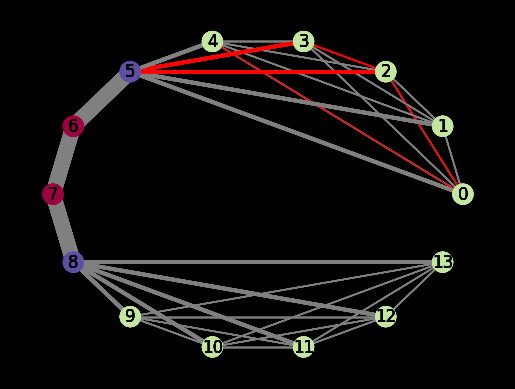

In [281]:
from random import choice # pseudo-randomness
from celluloid import Camera # creating animations

fig, ax = plt.subplots()
cam = Camera(fig) # for storing the frames

current = choice(list(G.nodes()))

used = set()
for step in range(6): # random walk
    neighbor = choice(list(G.neighbors(current)))
    used.add((current, neighbor))
    used.add((neighbor, current))

    ec = [ 'red' if e in used else 'gray' for e in G.edges() ]

    nx.draw(G,
        pos = coords,
        cmap = plt.get_cmap('Spectral'), # https://matplotlib.org/stable/tutorials/colors/colormaps.html
        edge_cmap = plt.get_cmap('Blues'),
        node_color = [rank[v] for v in G.nodes],
        edge_color = ec,
        width = [width * w + 1 for w in weight] ,
        **opt)

    ax.set_facecolor('black')
    fig.set_facecolor('black')
    ax.axis('off')
    print(current, neighbor)
    cam.snap() # take a snapshot
    current = neighbor

cam.snap() # take a snapshot at the end

In [282]:
import IPython
animation = cam.animate(interval = 900) # milliseconds between frames
show = display(IPython.display.HTML(animation.to_html5_video()))

Graphs: connected components

13 vertices, down from 14
31 edges, down from 33
2 cc
12 vertices, down from 14
25 edges, down from 33


[]

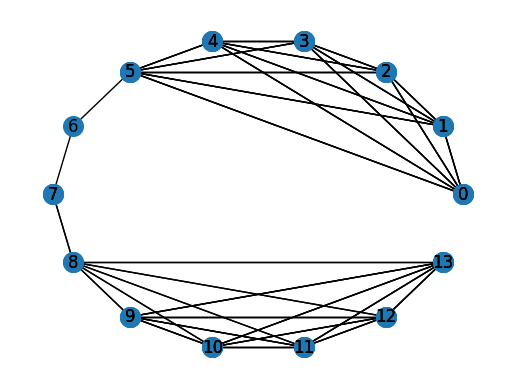

In [318]:
from random import choice
from celluloid import Camera # creating animations

fig, ax = plt.subplots()

Gc=G.copy()

goal = 3 # to how many pieces we wish to break it
n = G.number_of_nodes()
m = G.number_of_edges()

ad = []

cam = Camera(fig) # for storing the frames

nx.draw(Gc, pos = coords, **opt)
cam.snap() # take a snapshot
while Gc.number_of_nodes() > 0:

  broken = choice(list(Gc.nodes))
  Gc.remove_node(broken)
  nx.draw(Gc, pos = coords, **opt)
  cam.snap() # take a snapshot
  nNow = Gc.number_of_nodes()
  mNow = Gc.number_of_edges()
  print(f'{nNow} vertices, down from {n}')
  print(f'{mNow} edges, down from {m}')
  comp = [ cc for cc in nx.connected_components(Gc) ]
  pieces = len(comp)
  if pieces == 1:
    avgd = nx.average_shortest_path_length(Gc)
    print(f'Avg distance now at {avgd:.2f}')
    ad.append(avgd)
  elif pieces == goal:
    break
  else:
    print(pieces, 'cc')

cam.snap() # take a snapshot at the end

In [287]:
ad

[2.769230769230769]

In [319]:
import IPython
animation = cam.animate(interval = 900) # milliseconds between frames
show = display(IPython.display.HTML(animation.to_html5_video()))

In [257]:
cc = nx.connected_components(Gc)
for comp in cc:
  print(len(comp))

3
1
5


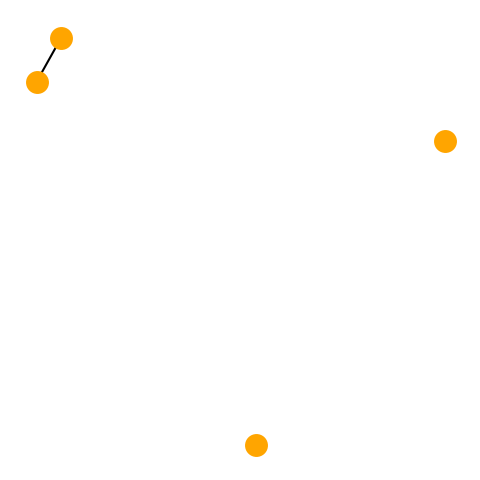

In [267]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (3, 3), dpi =  150)
nx.draw(Gc, pos = nx.spring_layout(Gc), node_size = 100, node_color = 'orange')